###Step 1 : Understand the dataset

In [3]:
#install the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [4]:
#import dataset
df = pd.read_csv('/content/Amazon Store Sales Data.xlsx - Sheet1 (1).csv')
df.head() #preview data

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,1/1/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online
1,4919,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online
2,4920,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards
3,3074,CA-2019-125206,1/3/2019,1/5/2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online
4,8604,US-2019-116365,1/3/2019,1/8/2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,0,Online


In [5]:
df.info() #dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [6]:
df.describe().T #stats summary

,count,mean,std,min,25%,50%,75%,max
Row ID+O6G3A1:R6,5901.0,5022.422471,2877.977184,1.000,2486.0000,5091.0000,7456.000,9994.000
Sales,5901.0,265.345589,474.260645,0.836,71.9760,128.6480,265.170,9099.930
Quantity,5901.0,3.781901,2.212917,1.000,2.0000,3.0000,5.000,14.000
Profit,5901.0,29.700408,259.589138,-6599.978,1.7955,8.5025,28.615,8399.976
Returns,5901.0,0.048636,0.215124,0.000,0.0000,0.0000,0.000,1.000


In [7]:
df.shape #r,c

(5901, 21)

In [8]:
df.dtypes #data types

,0
Row ID+O6G3A1:R6,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


###Checking for Missing values

In [9]:
df.isnull().sum()

,0
Row ID+O6G3A1:R6,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [10]:
df.duplicated().sum() #find duplicates

np.int64(0)

In [11]:
df['Ship Mode'].unique() #finds unique
df['Ship Mode'].nunique() #counts unique

4

In [12]:
df.value_counts('Ship Mode')

,count
Ship Mode,
Standard Class,3451
Second Class,1147
First Class,959
Same Day,344


In [13]:
int_columns = df.select_dtypes(include='int64')
display(int_columns.head())

,Row ID+O6G3A1:R6,Quantity,Returns
0,4918,1,0
1,4919,3,0
2,4920,2,0
3,3074,2,0
4,8604,2,0


Find top 5 cities by total sales.


In [14]:
top_cities = df.groupby('City')['Sales'].sum().nlargest(5)
top_cities

,Sales
City,
New York City,154919.6990
Los Angeles,120017.4405
San Francisco,80891.4220
Seattle,77924.5420
Philadelphia,77305.4400


Show monthly sales trends and visualize them.


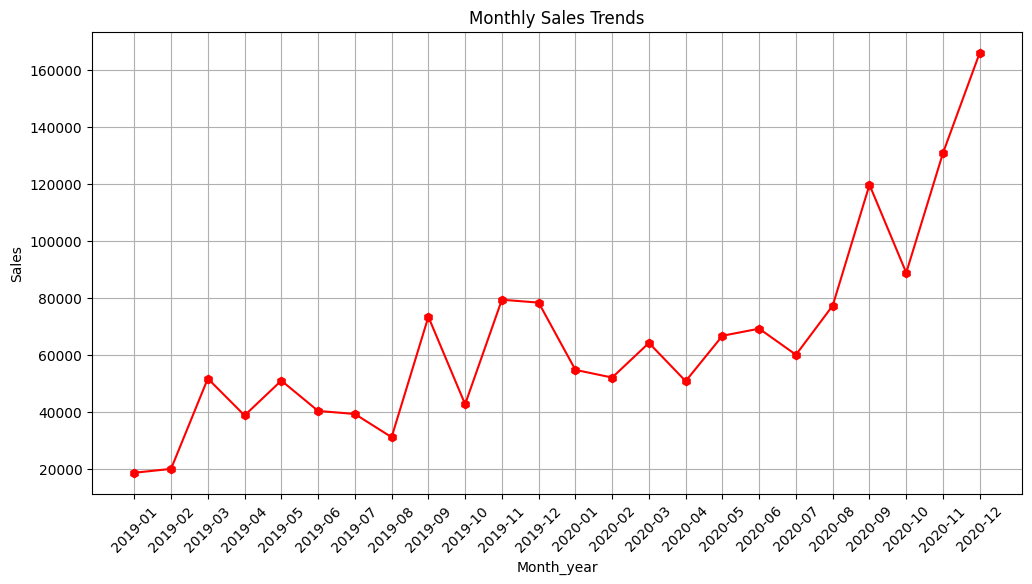

In [15]:
df['Order_date'] = pd.to_datetime(df['Order Date'])
df['Month_year'] = df['Order_date'].dt.to_period('M')
monthly_sales = df.groupby('Month_year')['Sales'].sum().reset_index()
monthly_sales['Month_year'] = monthly_sales['Month_year'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month_year'],monthly_sales['Sales'],marker='h', color="red")
plt.title('Monthly Sales Trends')
plt.xlabel('Month_year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

Which product categories bring the highest revenue?

Text(0, 0.5, 'Total Revenue')

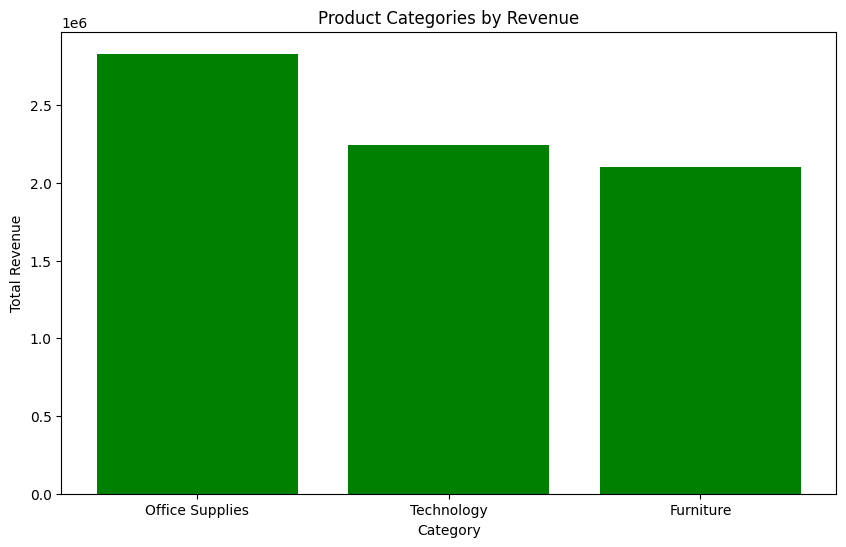

In [16]:
df['Product_Rev'] = df['Sales'] * df['Quantity']
product_revenue = df.groupby('Category')['Product_Rev'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='Product_Rev', ascending=False)
product_revenue

plt.figure(figsize=(10, 6))
plt.bar(product_revenue['Category'], product_revenue['Product_Rev'], color='green')
plt.title('Product Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')

Find the average order value per customer.

In [17]:
df['avg_order'] = df.groupby('Customer ID')['Sales'].transform('mean')
df[['Customer ID', 'Sales', 'avg_order']].head(10)

,Customer ID,Sales,avg_order
0,BM-11575,73.940,139.860750
1,BM-11575,173.940,139.860750
2,BM-11575,231.980,139.860750
3,LR-16915,114.460,296.548000
4,CA-12310,30.080,354.103429
5,CA-12310,165.600,354.103429
6,CA-12310,180.960,354.103429
7,BO-11350,1592.850,290.227333
8,BO-11350,11.880,290.227333
9,EB-13975,959.968,400.209167


Detect outliers in the sales amount column using IQR & visualize via boxplot.

Text(0, 0.5, 'Frequency')

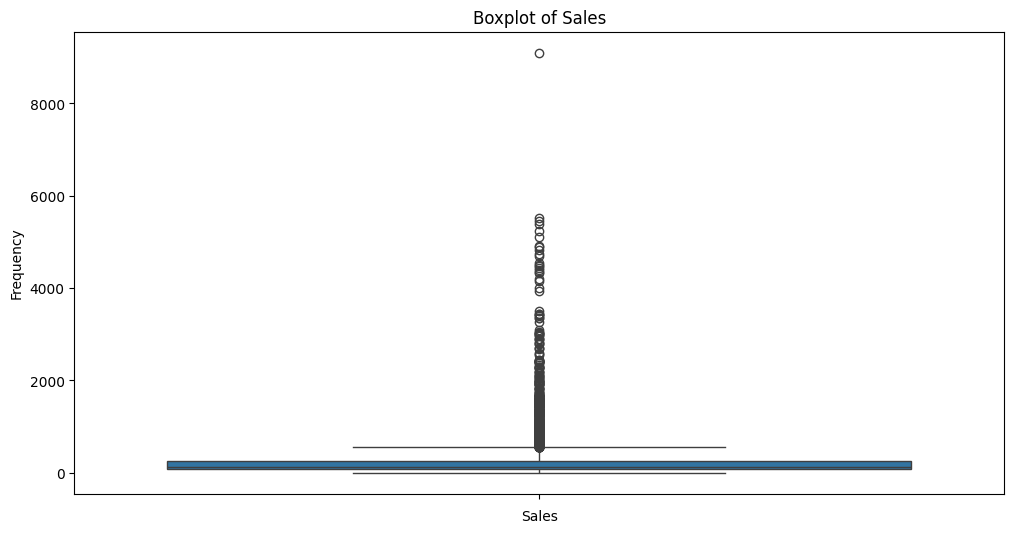

In [18]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
outliers

plt.figure(figsize=(12,6))
sns.boxplot(df['Sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')


heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

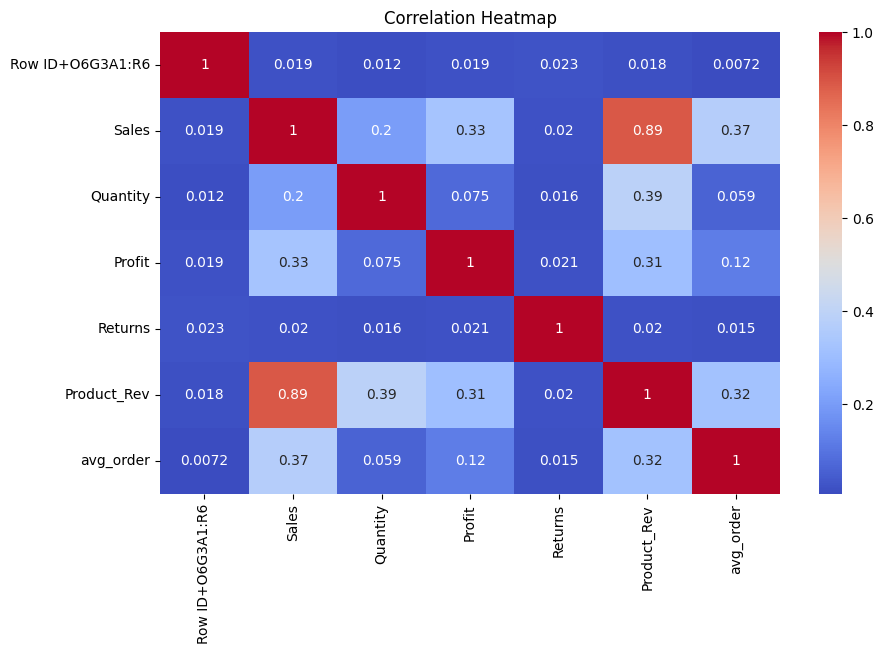

In [19]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Ship Mode Distribution')

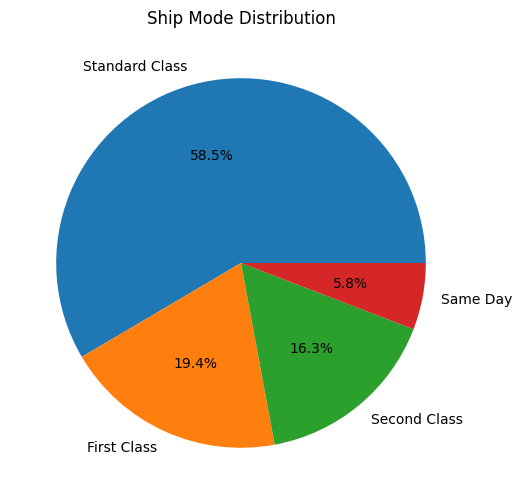

In [20]:
plt.figure(figsize=(10,6))
plt.pie(df['Ship Mode'].value_counts(),labels=df['Ship Mode'].unique(),autopct='%1.1f%%')
plt.title('Ship Mode Distribution')

Text(0.5, 1.0, 'Regional Distribution')

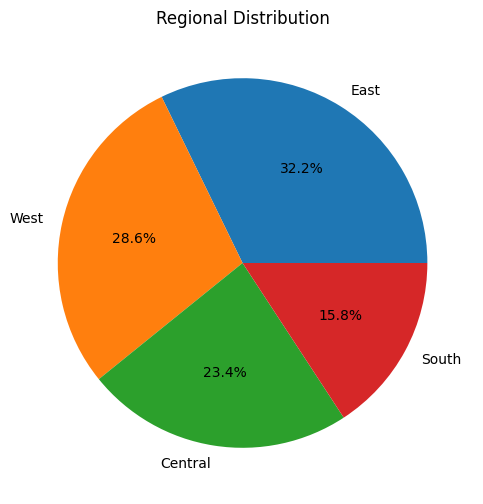

In [21]:
plt.figure(figsize=(10,6))
plt.pie(df['Region'].value_counts(),labels=df['Region'].unique(),autopct='%1.1f%%')
plt.title('Regional Distribution')

Text(0.5, 1.0, 'Country Distribution')

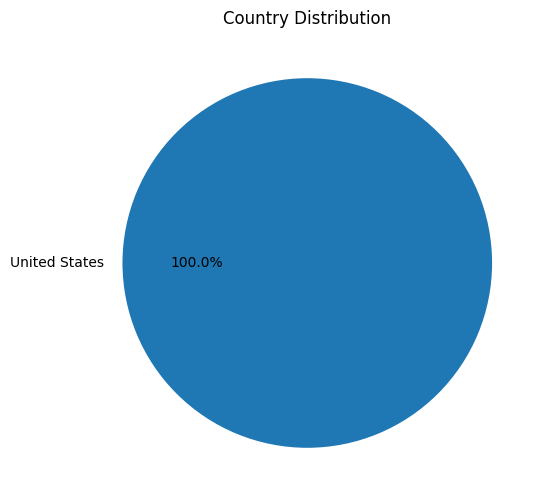

In [22]:
plt.figure(figsize=(10,6))
plt.pie(df['Country'].value_counts(),labels=df['Country'].unique(),autopct='%1.1f%%')
plt.title('Country Distribution')

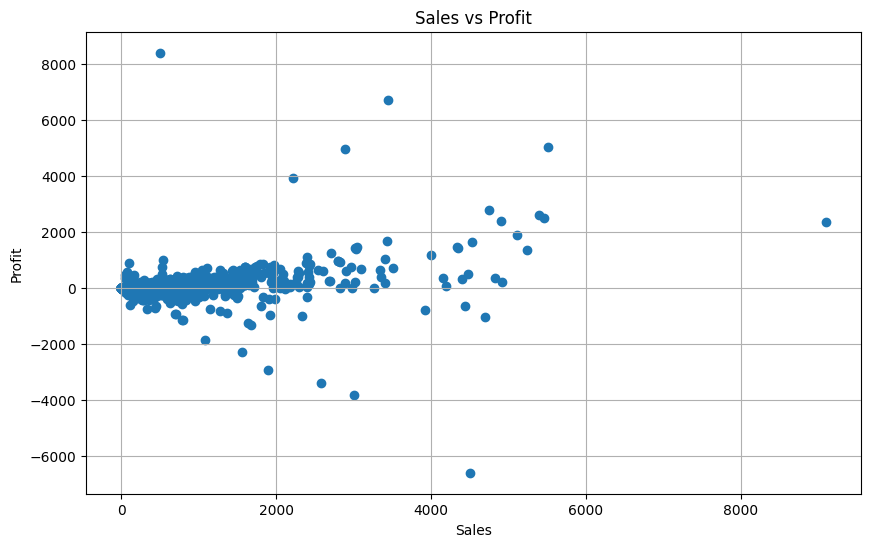

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'])
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

####MODEL

In [24]:
df['Returns'].value_counts()

,count
Returns,
0,5614
1,287


SMOTE - Synthetic minority oversampling technique - from imblearn.oversampling


In [38]:
X = df.drop(["Row ID+O6G3A1:R6", "Order ID", "Customer ID", "Customer Name", "Product Name", "Returns","Order_date", "Month_year"], axis=1)
y = df["Returns"]

cat_col = X.select_dtypes(include="object").columns
label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9277244494635799

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1685
           1       0.25      0.24      0.25        86

    accuracy                           0.93      1771
   macro avg       0.61      0.60      0.60      1771
weighted avg       0.93      0.93      0.93      1771



LOGISTIC REGRESSION ON RETURNS

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled_scaled, y_train_resampled)
y_pred = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.6956521739130435

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.82      1685
           1       0.06      0.33      0.09        86

    accuracy                           0.70      1771
   macro avg       0.50      0.52      0.46      1771
weighted avg       0.91      0.70      0.78      1771



MULTI CLASSIFICATION

In [27]:
df['Region'].value_counts()

,count
Region,
West,1901
East,1688
Central,1381
South,931


In [28]:
X = df.drop(["Row ID+O6G3A1:R6", "Order ID", "Customer ID", "Customer Name", "Product Name", "Region","Order_date", "Month_year"], axis=1)
y = df["Region"]

cat_col = X.select_dtypes(include="object").columns
label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.906832298136646

Classification Report:
               precision    recall  f1-score   support

     Central       0.89      0.89      0.89       414
        East       0.92      0.90      0.91       507
       South       0.77      0.91      0.83       279
        West       0.99      0.92      0.96       571

    accuracy                           0.91      1771
   macro avg       0.89      0.91      0.90      1771
weighted avg       0.91      0.91      0.91      1771




Logistic Regression Classification Report:

              precision    recall  f1-score   support

     Central       0.46      0.45      0.46       414
        East       0.61      0.63      0.62       507
       South       0.25      0.28      0.26       279
        West       0.68      0.63      0.66       571

    accuracy                           0.53      1771
   macro avg       0.50      0.50      0.50      1771
weighted avg       0.54      0.53      0.54      1771


Decision Tree Classification Report:

              precision    recall  f1-score   support

     Central       0.94      0.93      0.93       414
        East       0.98      0.95      0.96       507
       South       0.82      0.94      0.88       279
        West       1.00      0.96      0.98       571

    accuracy                           0.95      1771
   macro avg       0.93      0.95      0.94      1771
weighted avg       0.95      0.95      0.95      1771


Random Forest Classification Report:

       

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:23:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:

              precision    recall  f1-score   support

     Central       0.98      0.98      0.98       414
        East       0.99      0.99      0.99       507
       South       0.93      0.97      0.95       279
        West       1.00      0.97      0.99       571

    accuracy                           0.98      1771
   macro avg       0.97      0.98      0.98      1771
weighted avg       0.98      0.98      0.98      1771


KNN Classification Report:

              precision    recall  f1-score   support

     Central       0.44      0.48      0.46       414
        East       0.57      0.58      0.58       507
       South       0.26      0.35      0.30       279
        West       0.73      0.53      0.62       571

    accuracy                           0.51      1771
   macro avg       0.50      0.49      0.49      1771
weighted avg       0.54      0.51      0.52      1771


=== Model Performance Comparison ===

                 Model  Accur

/tmp/ipython-input-1835855169.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Blues_d")


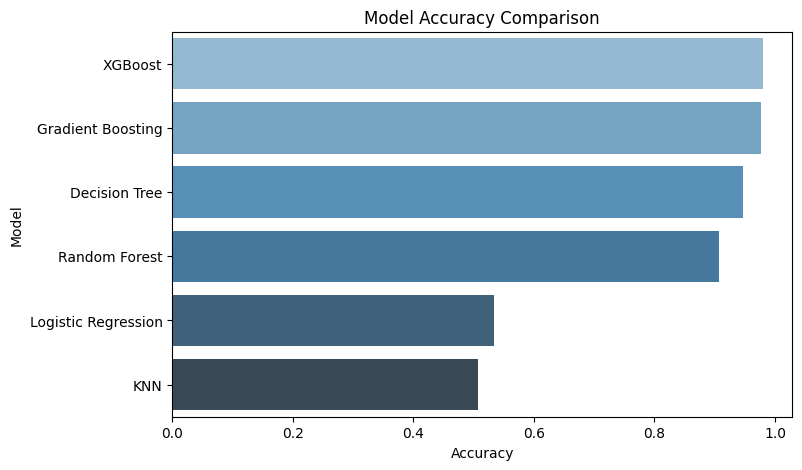

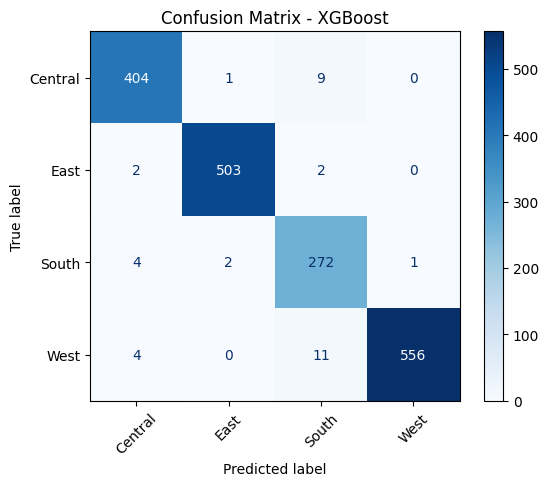

In [29]:

X = df.drop([
    "Row ID+O6G3A1:R6", "Order ID", "Customer ID", "Customer Name",
    "Product Name", "Region", "Order_date", "Month_year"
], axis=1)

y = df["Region"]

# --- ENCODE CATEGORICAL FEATURES ---
cat_col = X.select_dtypes(include="object").columns
label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# --- ENCODE TARGET (IMPORTANT FOR XGBOOST) ---
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# --- TRAIN-TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- HANDLE IMBALANCE USING SMOTE ---
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- STANDARDIZE FEATURES ---
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# --- DEFINE MODELS ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "KNN": KNeighborsClassifier()
}

# --- TRAIN & EVALUATE MODELS ---
results = []
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=y_le.classes_))

# --- CREATE PERFORMANCE TABLE ---
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Performance Comparison ===\n")
print(results_df)

# --- PLOT PERFORMANCE ---
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# --- BEST MODEL SELECTION ---
best_model_name = results_df.iloc[0, 0]
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

# --- CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [30]:
df['Segment'].value_counts()

,count
Segment,
Consumer,2997
Corporate,1774
Home Office,1130



Logistic Regression Classification Report:

                 precision    recall  f1-score   support

      Furniture       1.00      1.00      1.00       375
Office Supplies       1.00      1.00      1.00      1071
     Technology       1.00      1.00      1.00       325

       accuracy                           1.00      1771
      macro avg       1.00      1.00      1.00      1771
   weighted avg       1.00      1.00      1.00      1771


Decision Tree Classification Report:

                 precision    recall  f1-score   support

      Furniture       1.00      1.00      1.00       375
Office Supplies       1.00      1.00      1.00      1071
     Technology       1.00      1.00      1.00       325

       accuracy                           1.00      1771
      macro avg       1.00      1.00      1.00      1771
   weighted avg       1.00      1.00      1.00      1771


Random Forest Classification Report:

                 precision    recall  f1-score   support

      Furniture

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:23:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



KNN Classification Report:

                 precision    recall  f1-score   support

      Furniture       0.76      0.85      0.80       375
Office Supplies       0.87      0.81      0.84      1071
     Technology       0.71      0.77      0.74       325

       accuracy                           0.81      1771
      macro avg       0.78      0.81      0.79      1771
   weighted avg       0.82      0.81      0.81      1771


=== Model Performance Comparison ===

                 Model  Accuracy
0  Logistic Regression  1.000000
1        Decision Tree  1.000000
2        Random Forest  1.000000
3    Gradient Boosting  1.000000
4              XGBoost  1.000000
5                  KNN  0.812535


/tmp/ipython-input-3279041699.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Blues_d")


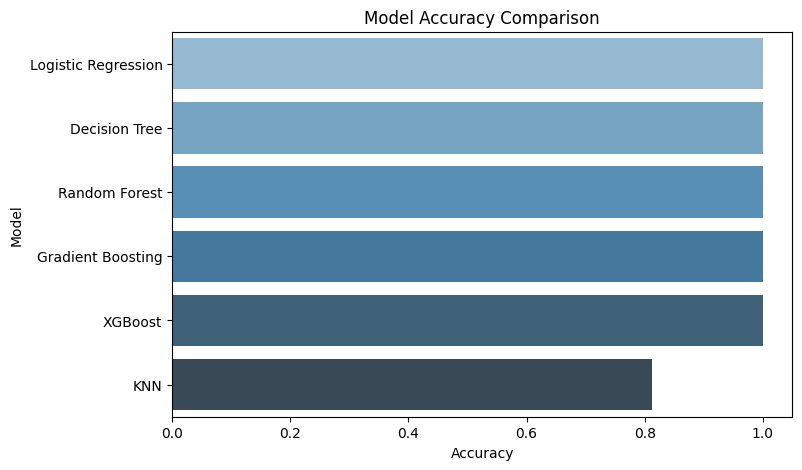

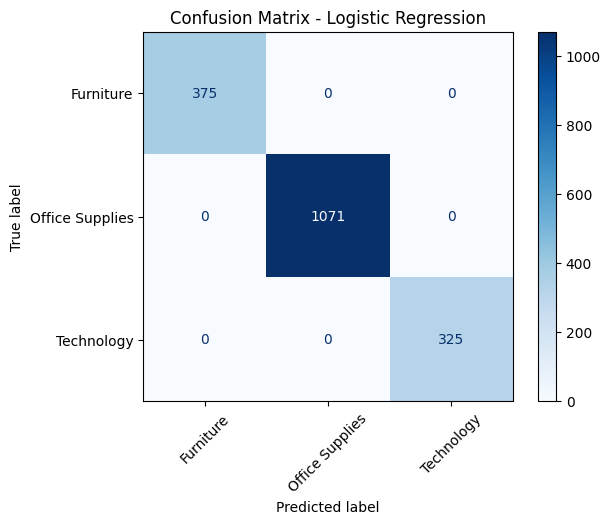

In [31]:
X = df.drop([
    "Row ID+O6G3A1:R6", "Order ID", "Customer ID", "Customer Name",
    "Product Name", "Category", "Order_date", "Month_year"
], axis=1)

y = df["Category"]

# --- ENCODE CATEGORICAL FEATURES ---
cat_col = X.select_dtypes(include="object").columns
label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# --- ENCODE TARGET (IMPORTANT FOR XGBOOST) ---
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# --- TRAIN-TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- HANDLE IMBALANCE USING SMOTE ---
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- STANDARDIZE FEATURES ---
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# --- DEFINE MODELS ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "KNN": KNeighborsClassifier()
}

# --- TRAIN & EVALUATE MODELS ---
results = []
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=y_le.classes_))

# --- CREATE PERFORMANCE TABLE ---
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Performance Comparison ===\n")
print(results_df)

# --- PLOT PERFORMANCE ---
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# --- BEST MODEL SELECTION ---
best_model_name = results_df.iloc[0, 0]
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

# --- CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()



Logistic Regression Classification Report:

              precision    recall  f1-score   support

 Accessories       0.97      0.91      0.94       138
  Appliances       0.86      0.81      0.83        84
         Art       0.73      0.82      0.77       140
     Binders       0.86      0.72      0.78       275
   Bookcases       0.58      0.90      0.71        39
      Chairs       0.86      0.70      0.77       107
     Copiers       0.44      0.73      0.55        11
   Envelopes       0.24      0.40      0.30        40
   Fasteners       0.31      0.51      0.38        37
 Furnishings       0.91      0.90      0.90       172
      Labels       0.44      0.41      0.43        63
    Machines       0.42      0.53      0.47        19
       Paper       0.90      0.81      0.85       248
      Phones       0.99      0.95      0.97       156
     Storage       0.84      0.75      0.79       149
    Supplies       0.53      0.89      0.67        36
      Tables       0.83      0.86   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:23:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:

              precision    recall  f1-score   support

 Accessories       1.00      1.00      1.00       138
  Appliances       1.00      0.99      0.99        84
         Art       0.97      0.99      0.98       140
     Binders       0.99      0.98      0.98       275
   Bookcases       1.00      1.00      1.00        39
      Chairs       1.00      0.99      1.00       107
     Copiers       1.00      1.00      1.00        11
   Envelopes       0.93      0.93      0.93        40
   Fasteners       0.97      0.92      0.94        37
 Furnishings       0.99      1.00      1.00       172
      Labels       0.94      0.95      0.94        63
    Machines       1.00      1.00      1.00        19
       Paper       0.99      0.99      0.99       248
      Phones       1.00      1.00      1.00       156
     Storage       0.99      1.00      0.99       149
    Supplies       1.00      0.94      0.97        36
      Tables       1.00      1.00      1.00     

/tmp/ipython-input-2159453699.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Blues_d")


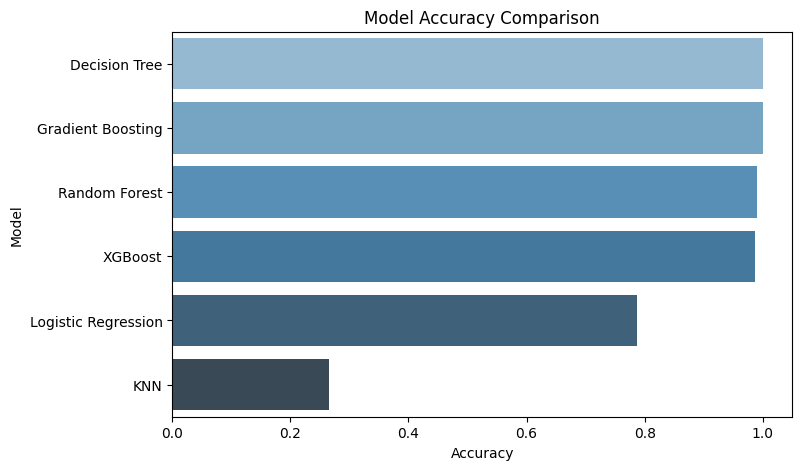

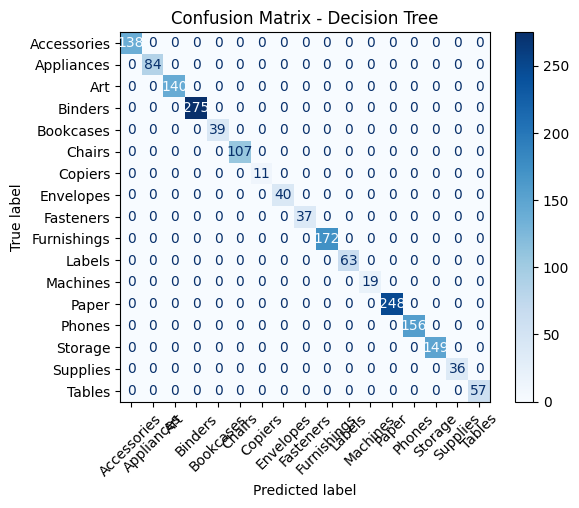

In [32]:
X = df.drop([
    "Row ID+O6G3A1:R6", "Order ID", "Customer ID", "Customer Name",
    "Product Name", "Sub-Category", "Order_date", "Month_year"
], axis=1)

y = df["Sub-Category"]

# --- ENCODE CATEGORICAL FEATURES ---
cat_col = X.select_dtypes(include="object").columns
label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# --- ENCODE TARGET (IMPORTANT FOR XGBOOST) ---
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# --- TRAIN-TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- HANDLE IMBALANCE USING SMOTE ---
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- STANDARDIZE FEATURES ---
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# --- DEFINE MODELS ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "KNN": KNeighborsClassifier()
}

# --- TRAIN & EVALUATE MODELS ---
results = []
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=y_le.classes_))

# --- CREATE PERFORMANCE TABLE ---
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Performance Comparison ===\n")
print(results_df)

# --- PLOT PERFORMANCE ---
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# --- BEST MODEL SELECTION ---
best_model_name = results_df.iloc[0, 0]
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

# --- CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


# Task
Perform regression analysis on the dataset.

## Prepare the data

### Subtask:
Select the features and target variable for regression.


**Reasoning**:
I need to select the features and target variable for regression analysis. I will select the numeric columns as features and 'Sales' as the target variable.



In [33]:
X = df.select_dtypes(include=np.number).drop(['Row ID+O6G3A1:R6', 'Sales', 'Returns'], axis=1)
y = df['Sales']

## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split`.



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train regression models

### Subtask:
Train various regression models on the training data.


**Reasoning**:
Import the necessary regression models and train them.



In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

for name, model in regression_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} training complete.")

Training Linear Regression...
Linear Regression training complete.
Training Ridge...
Ridge training complete.
Training Lasso...
Lasso training complete.
Training ElasticNet...
ElasticNet training complete.
Training Decision Tree Regressor...
Decision Tree Regressor training complete.
Training Random Forest Regressor...
Random Forest Regressor training complete.
Training Gradient Boosting Regressor...
Gradient Boosting Regressor training complete.
Training XGBoost Regressor...
XGBoost Regressor training complete.


## Evaluate models

### Subtask:
Evaluate the performance of the trained models using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained regression models using Mean Squared Error and R-squared.



In [36]:
from sklearn.metrics import mean_squared_error, r2_score

results = []
for name, model in regression_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R2 Score']).sort_values(by='R2 Score', ascending=False)
print(results_df)

                         Model           MSE  R2 Score
5      Random Forest Regressor   7442.213569  0.976158
6  Gradient Boosting Regressor   7500.090763  0.975973
4      Decision Tree Regressor  17885.653700  0.942702
7            XGBoost Regressor  23362.217388  0.925157
0            Linear Regression  43753.772603  0.859831
1                        Ridge  43753.863639  0.859831
2                        Lasso  43767.217028  0.859788
3                   ElasticNet  44010.453324  0.859009


## Visualize results

### Subtask:
Visualize the results of the regression analysis.


**Reasoning**:
Create bar plots to visualize the R2 Scores and MSE of the regression models.



/tmp/ipython-input-1594371586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=results_df, palette="Blues_d")


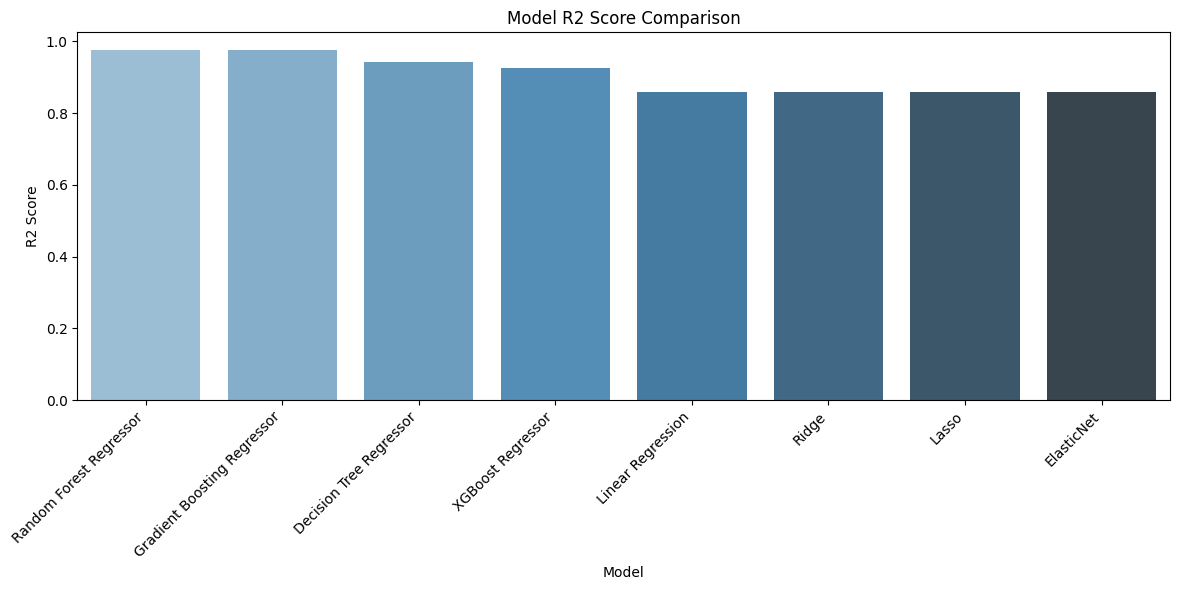

/tmp/ipython-input-1594371586.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results_df, palette="viridis")


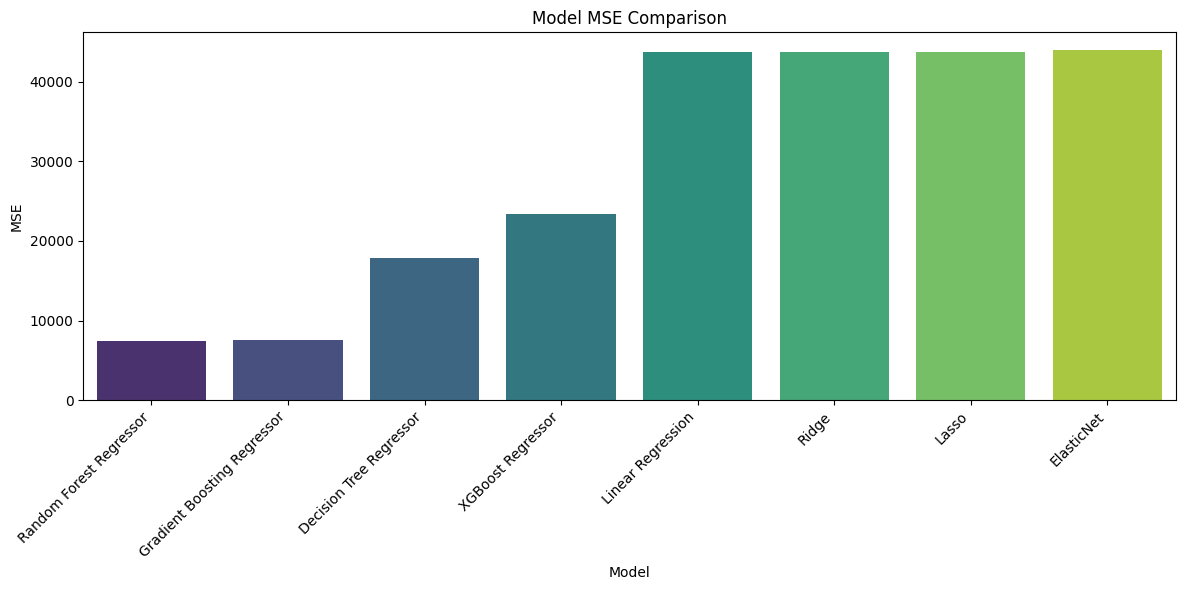

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2 Score", data=results_df, palette="Blues_d")
plt.title("Model R2 Score Comparison")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="MSE", data=results_df, palette="viridis")
plt.title("Model MSE Comparison")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Eight different regression models were trained on the data: Linear Regression, Ridge, Lasso, ElasticNet, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor.
*   The models were evaluated using Mean Squared Error (MSE) and R-squared (R2) score.
*   The Random Forest Regressor achieved the highest R2 score (0.976) and the lowest MSE (7442.21) on the test data, indicating the best performance among the evaluated models.
*   Gradient Boosting Regressor also performed very well, with an R2 score close to that of the Random Forest Regressor.
*   Traditional linear models (Linear Regression, Ridge, Lasso, ElasticNet) had significantly lower R2 scores compared to the tree-based models.


###SUMMARY

Data Analysis

I loaded and explored the Amazon Store Sales data to understand its structure. I checked for missing values, duplicates, and looked at the distribution of 'Ship Mode' and 'Region'.
I found the top 5 cities by total sales and visualized monthly sales trends, which showed clear seasonality with peaks at the end of the year.
I discovered that 'Office Supplies', 'Technology', and 'Furniture' bring in the highest revenue. I also calculated the average order value per customer.
I used the IQR method and a boxplot to detect outliers in the 'Sales' column and built a correlation heatmap to see relationships between numeric features.
I plotted the distribution of 'Ship Mode', 'Region', and 'Country' with pie charts, and made a scatter plot of 'Sales' vs 'Profit' to check their relationship.

🤖 Classification Analysis

I worked on predicting 'Returns' using binary classification. I handled class imbalance with SMOTE, trained a Random Forest model, and evaluated it with accuracy and a classification report.
I also trained a Logistic Regression model for the same task, scaling the data and using SMOTE.
For multi-class classification, I predicted 'Region' with SMOTE and Random Forest.
I also ran experiments predicting 'Category' and 'Sub-Category' with Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost, and KNN, then compared them with accuracy, classification reports, and visualizations.

📊 Regression Analysis

I prepared the data by selecting numeric features and used 'Sales' as the target variable. I split the data into training and testing sets.
I trained and tested eight regression models: Linear Regression, Ridge, Lasso, ElasticNet, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor.
I evaluated them using MSE and R², and the results showed that tree-based models — especially Random Forest and Gradient Boosting — performed best.
I visualized the R² scores and MSE values in bar plots to make the comparison easy.